MainProcess


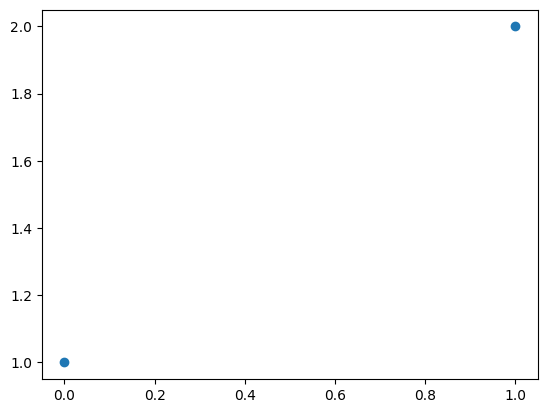

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
#Prepare datasets
# fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_1002_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

{'seed': 1002, 'n_ensemble': 3, 'n_epochs': 45, 'use_best_epoch': False, 'extra_data': True, 'trust_neg': 0, 'model_name': 'yolov8m'}


In [4]:
model = loaded_data.untrained_model
model.step1Labels.use_best_epoch = False
model.step1Labels.n_ensemble = 1
model.step1Labels.n_epochs = 251
model.train_data_selector.datasets = ['tom']

In [5]:
model.train(loaded_data.train_data, loaded_data.test_data)
fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
import shutil
shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
fls.dill_save(fls.temp_dir + '/intermediate_weights/model.pickle', model)

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/572 [00:00<?, ?it/s]

Clearing pytorch


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/72 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 572 tomograms, 0 motors, 0 slices
- Validation data: 72 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.129 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.128 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=22, cls=0.5, conf=None, copy

train: Scanning /flagellar/temp/yolo_dataset/labels/train.cache... 2994 images, 265 backgrounds, 9 corrupt: 100%|██████████| 2994/2994 [00:00<?, ?it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1418.5±891.7 MB/s, size: 77.2 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val.cache... 393 images, 24 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<?, ?it/s]


Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 251 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/251      4.81G      2.915      4.129       1.21         16        640: 100%|██████████| 249/249 [00:21<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.83it/s]

                   all        393        369      0.329      0.577      0.298       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/251      5.69G      2.351      1.938      1.047         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.17it/s]

                   all        393        369      0.769      0.699       0.74      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/251      5.69G      2.297      1.836      1.034         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.33it/s]

                   all        393        369      0.847      0.832      0.855      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/251      5.69G      2.139      1.684      1.003         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.32it/s]

                   all        393        369      0.856      0.792      0.869      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/251       5.7G      2.075      1.603     0.9771         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.26it/s]


                   all        393        369      0.803      0.784       0.83      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/251       5.7G      2.019       1.52     0.9748         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.52it/s]

                   all        393        369      0.889      0.827      0.859      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/251       5.7G      1.967      1.469     0.9611         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.31it/s]

                   all        393        369      0.886       0.84      0.906      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/251       5.7G       1.91      1.357     0.9536         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.11it/s]

                   all        393        369      0.954      0.894      0.951      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/251       5.7G       1.84      1.339     0.9395         15        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.32it/s]

                   all        393        369      0.886      0.851      0.855      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/251       5.7G      1.815      1.286     0.9339          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.26it/s]

                   all        393        369      0.977      0.837      0.942      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/251       5.7G      1.768      1.251     0.9249          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.28it/s]

                   all        393        369      0.977      0.907      0.943      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/251       5.7G      1.763      1.252     0.9232         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.22it/s]

                   all        393        369      0.966      0.859      0.934      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/251       5.7G      1.726      1.202     0.9131         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.36it/s]

                   all        393        369      0.967      0.878      0.942      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/251       5.7G      1.701      1.154     0.9125         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.38it/s]

                   all        393        369      0.958      0.859      0.919      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/251       5.7G      1.636      1.123     0.9021         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.36it/s]

                   all        393        369      0.947      0.897      0.953      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/251       5.7G      1.647      1.126     0.9035          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.27it/s]

                   all        393        369      0.955      0.928      0.957      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/251       5.7G      1.638      1.123     0.9015         17        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.44it/s]

                   all        393        369      0.971      0.894      0.947      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/251       5.7G      1.599      1.056     0.8974         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369      0.943      0.905      0.966      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/251       5.7G      1.578      1.043     0.8891         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.42it/s]

                   all        393        369      0.945      0.911      0.958      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/251       5.7G      1.564      1.061     0.8898         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.52it/s]

                   all        393        369      0.955      0.928      0.971      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/251       5.7G      1.555      1.041     0.8898         15        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.52it/s]

                   all        393        369      0.956      0.924      0.969      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/251       5.7G      1.525     0.9892     0.8873         17        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.57it/s]

                   all        393        369      0.977      0.916      0.965      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/251       5.7G      1.496     0.9709     0.8822         18        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.30it/s]

                   all        393        369      0.981      0.892      0.959       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/251       5.7G      1.472     0.9609     0.8816         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.45it/s]

                   all        393        369      0.951      0.887      0.931      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/251       5.7G      1.492     0.9632     0.8832         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.50it/s]

                   all        393        369      0.959      0.924      0.961       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/251       5.7G       1.49     0.9666      0.872         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.42it/s]

                   all        393        369      0.958      0.856      0.937      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/251       5.7G      1.477     0.9614     0.8811         18        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.58it/s]

                   all        393        369      0.958      0.908      0.959      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/251       5.7G      1.464     0.9537     0.8729         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.62it/s]

                   all        393        369      0.954      0.924      0.968      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/251       5.7G       1.44     0.9318     0.8739         22        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.56it/s]

                   all        393        369      0.961      0.938      0.981      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/251       5.7G      1.421     0.9001      0.872         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.54it/s]

                   all        393        369      0.972       0.94      0.979      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/251       5.7G       1.41     0.9011     0.8683         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.977       0.91      0.964      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/251       5.7G      1.428     0.9001     0.8661         19        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.56it/s]

                   all        393        369      0.964      0.913      0.965      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/251       5.7G      1.407     0.9109       0.87         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369       0.95      0.954      0.976       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/251       5.7G      1.392     0.8863     0.8662         24        640: 100%|██████████| 249/249 [00:19<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.934      0.918      0.957      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/251       5.7G      1.352     0.8801     0.8591         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369       0.97      0.882       0.95      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/251       5.7G      1.362     0.8853     0.8667         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.52it/s]

                   all        393        369      0.966      0.883      0.968      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/251       5.7G      1.337     0.8442     0.8604          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.971      0.899      0.952      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/251       5.7G      1.336     0.8471     0.8622         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.974      0.927      0.968      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/251       5.7G      1.338     0.8526     0.8636         17        640: 100%|██████████| 249/249 [00:19<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.969      0.929      0.972      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/251       5.7G      1.335     0.8316     0.8581          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.19it/s]

                   all        393        369       0.94      0.905       0.95      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/251       5.7G      1.315     0.8389      0.855         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369      0.968      0.921      0.955      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/251       5.7G      1.286     0.8101      0.855         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.37it/s]

                   all        393        369      0.983      0.914      0.959      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/251       5.7G      1.279     0.8153     0.8518          6        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.75it/s]

                   all        393        369      0.986      0.875      0.945      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/251       5.7G       1.28     0.7959     0.8532         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.958      0.933      0.977      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/251       5.7G      1.257     0.7983     0.8519         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.44it/s]

                   all        393        369      0.957      0.902      0.956      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/251       5.7G      1.272     0.7971     0.8478         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.976      0.892      0.958      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/251       5.7G      1.258     0.7977     0.8506         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369      0.957      0.916      0.966      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/251       5.7G      1.243     0.7798     0.8483         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.72it/s]

                   all        393        369      0.982        0.9       0.97       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/251       5.7G      1.237     0.7767     0.8495         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.49it/s]

                   all        393        369      0.969      0.917      0.975      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/251       5.7G      1.247     0.7732     0.8471         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369       0.98      0.911      0.964      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/251       5.7G      1.234     0.7666     0.8447         16        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.54it/s]

                   all        393        369      0.974      0.925       0.97      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/251       5.7G        1.2     0.7433     0.8405         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369      0.973      0.911      0.966      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/251       5.7G      1.226     0.7504     0.8482         24        640: 100%|██████████| 249/249 [00:19<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.38it/s]

                   all        393        369      0.963      0.924      0.965       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/251       5.7G      1.209       0.76     0.8466         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.51it/s]

                   all        393        369      0.972       0.93      0.969      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/251       5.7G      1.206      0.754     0.8423         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.57it/s]

                   all        393        369      0.988      0.897      0.958      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/251       5.7G        1.2     0.7468     0.8439         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.985      0.919      0.976      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/251       5.7G      1.175     0.7384     0.8372         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.42it/s]

                   all        393        369      0.977      0.909      0.965      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/251       5.7G       1.13     0.6936      0.835          6        640: 100%|██████████| 249/249 [00:20<00:00, 12.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.58it/s]

                   all        393        369      0.974      0.925      0.973      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/251       5.7G      1.161     0.7209     0.8372         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.974      0.959      0.977      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/251       5.7G      1.156      0.715     0.8399         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.48it/s]


                   all        393        369      0.967       0.94      0.977      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/251       5.7G      1.163     0.7076     0.8358         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.989      0.908      0.973      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/251       5.7G      1.141     0.6968     0.8352         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.74it/s]

                   all        393        369      0.978      0.927       0.98      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/251       5.7G      1.145     0.7028     0.8332         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369       0.97      0.951      0.976      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/251       5.7G      1.127     0.6949     0.8364         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.978      0.943      0.985      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/251       5.7G      1.105     0.6832     0.8296         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.972       0.94      0.977        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/251       5.7G      1.122     0.6986     0.8346         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.997      0.932      0.975      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/251       5.7G       1.12     0.6981     0.8341          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.969      0.919      0.971      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/251       5.7G      1.103     0.6952     0.8306         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.991      0.923      0.968      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/251       5.7G      1.116     0.6728     0.8357          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.978      0.935      0.975      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/251       5.7G      1.127     0.6866     0.8327         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.72it/s]

                   all        393        369      0.977      0.937      0.979       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/251       5.7G      1.103     0.6899     0.8298          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.983      0.921       0.97      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/251       5.7G      1.087     0.6692     0.8292         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369       0.98      0.951      0.979      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/251       5.7G       1.09     0.6711     0.8341         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.986      0.935      0.982      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/251       5.7G      1.058     0.6579     0.8268         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.983      0.929      0.977      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/251       5.7G       1.11      0.667     0.8357         19        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.57it/s]

                   all        393        369      0.975       0.95      0.978      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/251       5.7G      1.055     0.6443     0.8258         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.51it/s]

                   all        393        369      0.977       0.93      0.974      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/251       5.7G      1.064     0.6476      0.828         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.972      0.954      0.984      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/251       5.7G      1.029     0.6204     0.8284         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.968      0.951      0.985      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/251       5.7G      1.072     0.6512     0.8277         24        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.75it/s]

                   all        393        369      0.954      0.951      0.977      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/251       5.7G      1.055     0.6397     0.8261         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.71it/s]

                   all        393        369      0.959      0.953      0.984      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/251       5.7G      1.035      0.625     0.8284         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.72it/s]

                   all        393        369      0.983      0.919      0.985      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/251       5.7G      1.065     0.6406     0.8299         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.56it/s]

                   all        393        369      0.983      0.929      0.973      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/251       5.7G      1.043      0.648     0.8281         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.71it/s]

                   all        393        369      0.985      0.943      0.985        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/251       5.7G      1.035     0.6364     0.8259          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369       0.98      0.927       0.97      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/251       5.7G      1.041     0.6348     0.8253         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.983      0.946      0.986      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/251       5.7G      1.004     0.6159     0.8223         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.975      0.943      0.988      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/251       5.7G      1.013     0.6061     0.8198         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.974      0.951      0.983      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/251       5.7G       1.03     0.6268     0.8279         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.73it/s]

                   all        393        369      0.964      0.949      0.982      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/251       5.7G      1.007     0.6046     0.8244         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.75it/s]

                   all        393        369      0.961      0.932      0.978      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/251       5.7G       1.01      0.624      0.822         18        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.975      0.959      0.982      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/251       5.7G      1.007      0.598     0.8242         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369       0.97      0.959      0.979       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/251       5.7G      1.007     0.6112     0.8254         21        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.978      0.944      0.983      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/251       5.7G      1.001     0.6166     0.8255         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.72it/s]

                   all        393        369      0.982      0.912      0.969      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/251       5.7G     0.9846     0.6158     0.8208         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.977       0.92      0.973      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/251       5.7G     0.9875     0.6103     0.8201         17        640: 100%|██████████| 249/249 [00:20<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.979      0.935      0.975      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/251       5.7G     0.9675     0.5923     0.8209         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.958      0.934      0.983      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/251       5.7G     0.9917     0.6011     0.8182         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.71it/s]

                   all        393        369       0.96       0.94      0.987      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/251       5.7G     0.9658     0.5901     0.8197          5        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.961      0.931      0.974      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/251       5.7G     0.9763     0.5923     0.8156         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.74it/s]

                   all        393        369      0.967      0.944      0.974      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/251       5.7G     0.9627     0.5842     0.8198         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.977      0.923      0.975      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/251       5.7G     0.9799     0.5951     0.8172         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.971       0.93      0.985      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/251       5.7G     0.9437     0.5704     0.8174         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369      0.964      0.934      0.982      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/251       5.7G     0.9487     0.5702     0.8178         17        640: 100%|██████████| 249/249 [00:20<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.971      0.907      0.974      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/251       5.7G     0.9558     0.5903     0.8165         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.978      0.916       0.98      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/251       5.7G     0.9483     0.5818     0.8181         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.966      0.927      0.972        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/251       5.7G     0.9128     0.5565     0.8158         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369       0.98      0.916      0.979      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/251       5.7G     0.9153     0.5611     0.8134         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.79it/s]

                   all        393        369      0.974      0.932      0.971      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/251       5.7G     0.9158     0.5531     0.8136          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369       0.98      0.927      0.974      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/251       5.7G     0.9164     0.5613       0.81         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.986      0.911       0.97      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/251       5.7G     0.9069     0.5491      0.813          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.983      0.931      0.978      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/251       5.7G     0.9123      0.546     0.8114         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369       0.98      0.935      0.973      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/251       5.7G     0.9169     0.5491     0.8126         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.57it/s]

                   all        393        369      0.981      0.919      0.968      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/251       5.7G     0.9157     0.5712     0.8103         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.84it/s]

                   all        393        369      0.976      0.927       0.98      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/251       5.7G     0.8965     0.5365     0.8114         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.75it/s]

                   all        393        369      0.985      0.913      0.975      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/251       5.7G     0.9174     0.5572     0.8148          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.84it/s]

                   all        393        369      0.988      0.897      0.975      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/251       5.7G     0.9154     0.5563     0.8129         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.977      0.909      0.964      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/251       5.7G     0.8879     0.5416     0.8143         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.985      0.901      0.954      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/251       5.7G     0.8921     0.5284       0.81         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369      0.977      0.904      0.965      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/251       5.7G     0.8751     0.5126     0.8078         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369       0.97      0.924      0.967      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/251       5.7G      0.906     0.5364     0.8148         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.49it/s]

                   all        393        369      0.977      0.914      0.967      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/251       5.7G     0.8813     0.5217     0.8078         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.979      0.938      0.984      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/251       5.7G      0.851     0.5225     0.8088         17        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.84it/s]

                   all        393        369      0.977      0.913      0.974      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/251       5.7G     0.8706     0.5267     0.8105         15        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.53it/s]

                   all        393        369      0.977      0.931      0.975      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/251       5.7G     0.8856     0.5398     0.8118         21        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.974       0.91      0.964      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/251       5.7G     0.8854     0.5314     0.8136         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.94it/s]

                   all        393        369      0.977      0.906      0.961      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/251       5.7G     0.9014     0.5464     0.8159         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369       0.98      0.914       0.97      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/251       5.7G     0.8642     0.5155     0.8118         19        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.985      0.908      0.965      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/251       5.7G      0.858     0.5215     0.8085          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.983      0.917      0.961      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/251       5.7G     0.8612     0.5219     0.8086          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.89it/s]

                   all        393        369       0.99      0.913      0.957      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/251       5.7G     0.8319     0.5117     0.8092         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.91it/s]

                   all        393        369      0.985       0.91      0.966       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/251       5.7G     0.8427      0.503     0.8068         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.983      0.914      0.962      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/251       5.7G     0.8345     0.5002     0.8068         19        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.985       0.92      0.971      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/251       5.7G     0.8318     0.4994     0.8078         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.981      0.916      0.976      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/251       5.7G     0.8544     0.5066     0.8109         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.977      0.923      0.973      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/251       5.7G     0.8458     0.5084     0.8095         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.48it/s]

                   all        393        369      0.977      0.928      0.969      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/251       5.7G     0.8338     0.4989     0.8064         17        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.89it/s]

                   all        393        369       0.98      0.932      0.974        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/251       5.7G     0.8215     0.4941     0.8047         18        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.973      0.919      0.973      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/251       5.7G     0.8253      0.505     0.8073         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.74it/s]

                   all        393        369       0.98      0.907      0.976      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/251       5.7G     0.8142      0.484     0.8076          2        640: 100%|██████████| 249/249 [00:19<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.73it/s]

                   all        393        369       0.98      0.918      0.976      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/251       5.7G     0.8112     0.4876     0.8068         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.53it/s]

                   all        393        369      0.983      0.923      0.977      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/251       5.7G     0.8301      0.497     0.8044         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.73it/s]

                   all        393        369      0.978      0.932      0.979      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/251       5.7G     0.8111     0.4845      0.804          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.984       0.93      0.977      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/251       5.7G     0.8012     0.4703     0.8081         20        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.92it/s]

                   all        393        369      0.985      0.919      0.976      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/251       5.7G     0.8116     0.4983       0.81         18        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369       0.98      0.913      0.971       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/251       5.7G     0.8176     0.4882     0.8057         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.981      0.908      0.969      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/251       5.7G     0.8057     0.4758     0.8031          4        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.977      0.915      0.973      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/251       5.7G     0.7895     0.4773     0.8057         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.977      0.914      0.972      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/251       5.7G     0.7993     0.4766     0.8048         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.974       0.93      0.972      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/251       5.7G     0.8056     0.4796     0.8027         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.973      0.916      0.967      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/251       5.7G     0.7724     0.4725        0.8          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.981      0.916      0.969      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/251       5.7G     0.7791      0.468     0.8051         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.74it/s]

                   all        393        369      0.982        0.9      0.961      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/251       5.7G     0.7975      0.473     0.8107          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.84it/s]

                   all        393        369      0.979      0.897      0.956      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/251       5.7G     0.7931     0.4854     0.7991          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.97it/s]

                   all        393        369      0.979      0.906       0.96      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/251       5.7G     0.7684     0.4497     0.8029         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.983      0.894      0.963      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/251       5.7G     0.7757      0.475     0.8063         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.79it/s]

                   all        393        369      0.985      0.894      0.959      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/251       5.7G     0.7968     0.4772     0.8032         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.985      0.913      0.969      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/251       5.7G     0.7902     0.4682      0.806         17        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.981      0.902      0.971      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/251       5.7G     0.7847     0.4649     0.8048         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.79it/s]

                   all        393        369      0.982      0.908      0.969      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/251       5.7G     0.7552     0.4509     0.7988         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.92it/s]

                   all        393        369      0.985      0.899       0.96      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/251       5.7G     0.7802     0.4626      0.802         18        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.985      0.897      0.964      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/251       5.7G      0.742     0.4433     0.8018         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.985      0.892      0.964      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/251       5.7G     0.7563     0.4483     0.8034         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.91it/s]

                   all        393        369      0.979      0.892      0.963      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/251       5.7G     0.7456     0.4527     0.7998         16        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 14.04it/s]

                   all        393        369      0.982      0.895      0.959      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/251       5.7G     0.7557     0.4477     0.8038          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.985      0.897      0.962      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/251       5.7G     0.7389     0.4575     0.7981         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.91it/s]

                   all        393        369      0.985      0.907      0.972      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/251       5.7G     0.7529     0.4526      0.807         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.985      0.906      0.973      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/251       5.7G     0.7478      0.452     0.7973         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.985      0.905      0.978      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/251       5.7G      0.755     0.4448     0.8012         18        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.92it/s]

                   all        393        369      0.985      0.919      0.979      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/251       5.7G     0.7436     0.4435     0.8005          4        640: 100%|██████████| 249/249 [00:19<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.95it/s]

                   all        393        369      0.983      0.916      0.978       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/251       5.7G     0.7278     0.4346     0.7992         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.98it/s]

                   all        393        369      0.984      0.908      0.976      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/251       5.7G     0.7457     0.4359     0.8009         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369      0.979      0.906      0.975      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/251       5.7G     0.7435     0.4504     0.8018         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369       0.98      0.908      0.974       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/251       5.7G     0.7188     0.4308     0.7972         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.979      0.904      0.974      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/251       5.7G      0.733     0.4342     0.7977         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.93it/s]

                   all        393        369      0.979      0.904      0.974      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/251       5.7G     0.7261     0.4274     0.7974          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.75it/s]

                   all        393        369      0.979      0.906      0.972       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/251       5.7G     0.7267     0.4372     0.7986         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369       0.98      0.907      0.973      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/251       5.7G      0.724     0.4307     0.8019         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.94it/s]

                   all        393        369      0.977      0.909      0.973      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/251       5.7G     0.7041     0.4186     0.7934         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.88it/s]

                   all        393        369      0.977      0.909      0.973      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/251       5.7G     0.7002     0.4118     0.7973         21        640: 100%|██████████| 249/249 [00:19<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.977       0.91      0.973      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/251       5.7G      0.715     0.4259     0.7958         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.977      0.909      0.973      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/251       5.7G     0.7008     0.4193      0.795         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.88it/s]

                   all        393        369      0.977       0.91      0.974      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/251       5.7G     0.7023     0.4249     0.7961         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.96it/s]

                   all        393        369      0.977      0.916      0.973      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/251       5.7G      0.686     0.4129      0.794         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.977      0.908      0.972      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/251       5.7G     0.7086     0.4326     0.7957         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.65it/s]

                   all        393        369      0.977      0.906      0.971       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/251       5.7G     0.7084     0.4274     0.8003         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.94it/s]

                   all        393        369      0.977      0.909      0.972      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/251       5.7G     0.6891     0.4128     0.7943         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.99it/s]

                   all        393        369      0.977      0.909      0.973       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/251       5.7G     0.7019     0.4225     0.7984         18        640: 100%|██████████| 249/249 [00:19<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.94it/s]

                   all        393        369      0.977      0.906      0.973      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/251       5.7G     0.6764      0.406     0.7929         18        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.84it/s]

                   all        393        369      0.979      0.904      0.973      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/251       5.7G     0.6827     0.4084     0.7943         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.94it/s]

                   all        393        369      0.977      0.911      0.973      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/251       5.7G     0.6943     0.4093     0.7968         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.974      0.914      0.972       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/251       5.7G     0.6741     0.4024     0.7914         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.977      0.915       0.97      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/251       5.7G     0.6905     0.4115     0.7979         16        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.96it/s]

                   all        393        369      0.977      0.917      0.971      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/251       5.7G     0.6902     0.4157     0.7951         17        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.977      0.919      0.972      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/251       5.7G     0.6801     0.4027     0.7983         16        640: 100%|██████████| 249/249 [00:20<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.974      0.912      0.971      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/251       5.7G     0.6795     0.4112     0.7926         18        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.97it/s]

                   all        393        369      0.977      0.911      0.973      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/251       5.7G     0.6939     0.4135     0.7972         17        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.88it/s]

                   all        393        369      0.977      0.916      0.974       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/251       5.7G     0.6766     0.4079      0.793         16        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.974      0.917      0.973      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/251       5.7G     0.6662     0.3998     0.7947         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.52it/s]

                   all        393        369      0.977      0.915      0.973      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/251       5.7G     0.6786     0.4144     0.7999          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.70it/s]

                   all        393        369      0.977       0.91      0.972      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/251       5.7G     0.6667     0.4067      0.796         17        640: 100%|██████████| 249/249 [00:19<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.977       0.91      0.971      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/251       5.7G     0.6591     0.4041     0.7968         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.58it/s]

                   all        393        369      0.977      0.913      0.971      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/251       5.7G     0.6559     0.3985     0.7923         14        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.95it/s]

                   all        393        369      0.977      0.908       0.97       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/251       5.7G     0.6671     0.3971     0.7948          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.977      0.906      0.967      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/251       5.7G     0.6717     0.4086     0.7947         24        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.73it/s]

                   all        393        369      0.979      0.901      0.966      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/251       5.7G     0.6656     0.3975     0.7942         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.97it/s]

                   all        393        369      0.979      0.906      0.965      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/251       5.7G     0.6614     0.4003     0.7953         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.88it/s]

                   all        393        369      0.979      0.902      0.964      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/251       5.7G     0.6395     0.3782     0.7899         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.976      0.899      0.964      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/251       5.7G      0.659     0.3958     0.7959         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.92it/s]

                   all        393        369      0.976      0.898      0.964      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/251       5.7G     0.6866     0.4146     0.7951         13        640: 100%|██████████| 249/249 [00:20<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.93it/s]

                   all        393        369      0.976      0.892      0.964      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/251       5.7G     0.6524     0.3903     0.7926         18        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.979      0.899      0.964      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/251       5.7G     0.6559     0.3935     0.7918         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369      0.979      0.903      0.965      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/251       5.7G     0.6548     0.3883     0.7943         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.91it/s]

                   all        393        369      0.979      0.902      0.965      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/251       5.7G     0.6577     0.3935     0.7955         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.98it/s]

                   all        393        369      0.982      0.902      0.964      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/251       5.7G     0.6526     0.3952     0.7957         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.97it/s]

                   all        393        369      0.981      0.908      0.967      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/251       5.7G     0.6472      0.387     0.7939          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.981      0.908      0.967      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/251       5.7G     0.6479     0.3851     0.7928         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.982      0.908      0.966      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/251       5.7G     0.6607     0.3952     0.7912         18        640: 100%|██████████| 249/249 [00:19<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.982      0.911      0.967      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/251       5.7G     0.6614     0.3998     0.7985         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.79it/s]

                   all        393        369      0.982      0.907      0.967      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/251       5.7G     0.6418     0.3864     0.7914         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.94it/s]

                   all        393        369      0.982      0.904      0.968      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/251       5.7G      0.656     0.3897     0.7942         17        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369      0.982      0.902      0.969      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/251       5.7G      0.638     0.3811     0.7933          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.981        0.9      0.969      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/251       5.7G     0.6229     0.3867     0.7919         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.20it/s]

                   all        393        369       0.98        0.9       0.97      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/251       5.7G     0.6354     0.3892     0.7927          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369       0.98        0.9       0.97      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/251       5.7G     0.6565     0.3973     0.7965         19        640: 100%|██████████| 249/249 [00:19<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.92it/s]

                   all        393        369      0.982        0.9      0.968      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/251       5.7G     0.6479     0.3888     0.7924         13        640: 100%|██████████| 249/249 [00:19<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.983      0.897      0.968      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/251       5.7G     0.6412     0.3812     0.7916         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.98it/s]

                   all        393        369      0.983        0.9      0.968      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/251       5.7G     0.6352     0.3751     0.7953         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.57it/s]

                   all        393        369      0.983        0.9      0.968       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/251       5.7G     0.6279     0.3792     0.7909         15        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.86it/s]

                   all        393        369      0.983      0.902      0.968      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/251       5.7G     0.6456     0.3859     0.7969         15        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.99it/s]

                   all        393        369      0.982      0.902      0.969      0.642


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/251       5.7G     0.4177     0.2408     0.7677          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.977      0.902      0.971      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/251       5.7G     0.4028       0.23     0.7689         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.975      0.902       0.97      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/251       5.7G      0.395     0.2265     0.7743          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.96it/s]

                   all        393        369      0.973      0.902      0.971      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/251       5.7G     0.3944     0.2214     0.7719          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.971      0.902      0.971      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/251       5.7G     0.3898     0.2242     0.7685          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.96it/s]

                   all        393        369      0.972      0.902      0.971      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/251       5.7G     0.3852     0.2197     0.7729          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.89it/s]

                   all        393        369      0.971      0.902      0.971      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/251       5.7G     0.3868     0.2206     0.7742          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.972      0.902      0.971       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/251       5.7G     0.3874     0.2207     0.7715          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.89it/s]

                   all        393        369      0.974      0.904      0.971      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/251       5.7G     0.3864     0.2197      0.772          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.974      0.905      0.971      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/251       5.7G     0.3746     0.2169     0.7709          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.74it/s]

                   all        393        369      0.973      0.905      0.971      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/251       5.7G     0.3822     0.2166     0.7732          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.974      0.905       0.97      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/251       5.7G     0.3745     0.2128     0.7745          6        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.973      0.905       0.97      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/251       5.7G     0.3769     0.2165     0.7729          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.90it/s]

                   all        393        369      0.972      0.905       0.97      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/251       5.7G     0.3712     0.2133     0.7689          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.972      0.905       0.97      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/251       5.7G     0.3705     0.2181     0.7679          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.72it/s]

                   all        393        369      0.974      0.905      0.969      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/251       5.7G     0.3731     0.2167     0.7721          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.974      0.905      0.968      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/251       5.7G     0.3691     0.2126     0.7698          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.87it/s]

                   all        393        369      0.974      0.904      0.968      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/251       5.7G      0.375     0.2193     0.7688          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.974      0.903      0.968      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/251       5.7G     0.3778     0.2153     0.7693          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.973      0.902      0.968      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/251       5.7G     0.3657     0.2097     0.7697          7        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.82it/s]

                   all        393        369      0.974      0.902      0.968      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/251       5.7G     0.3669     0.2135     0.7714          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.85it/s]

                   all        393        369      0.975      0.902      0.968      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/251       5.7G      0.372     0.2179     0.7697          6        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.71it/s]

                   all        393        369      0.975      0.902      0.968      0.636



251 epochs completed in 1.507 hours.
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/last.pt, 52.1MB
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/best.pt, 52.1MB

Validating /flagellar/temp/yolo_weights/motor_detector/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  7.12it/s]


                   all        393        369      0.961      0.934      0.978      0.612
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /flagellar/temp/yolo_weights/motor_detector

Training complete!


In [ ]:
import ultralytics
import time
test_data = loaded_data.test_data
data_list = []
times = []
epoch_list = [0,10,15,20,25,30,50,100,150,200,250]
for epoch in epoch_list:
    t=time.time()
    model = fls.dill_load(fls.temp_dir + '/intermediate_weights/model.pickle')
    model.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights/epoch' + str(epoch) + '.pt')]
    model.step1Labels.concentration = 2
    model.run_in_parallel=False
    data_list.append(model.infer(test_data))
    times.append(time.time()-t)
fls.dill_save(fls.temp_dir + 'intermediate_data.pickle', data_list)

Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
      z    y    x  confidence
0   623  320  620    0.404541
1   597  442  292    0.296631
2   573  345  239    0.277588
3   537  453  310    0.197388
4   653   50  467    0.193115
5   559  347  476    0.180664
6   485  673  765    0.166138
7   673  913   46    0.148560
8   463  253  137    0.141724
9   487  855  489    0.128052
10  168  281  931    0.120422
11  655  661  321    0.112000
12  573  456  779    0.107788
13  631  531  806    0.101257
14  627  284  104    0.098450
15  615  709  357    0.095337
16  587  150  453    0.091370
17  603  705  367    0.091370
18  511  381  660    0.091064
19  619  284   46    0.086609
20  645  587  312    0.086609
21  569  309  199    0.085388
22  671  365  678    0.085083
23  509  443  698    0.084473
24  619  148  415    0.084167

Clearing pytorch
Clearing cu

In [ ]:
times

In [ ]:
data_list = fls.dill_load(fls.temp_dir + 'intermediate_data.pickle')
#epoch_list = [0,20,40,60,80,100,120,140]
import flg_diagnostics
import importlib
importlib.reload(flg_diagnostics)
scores = []
for d in data_list:
    a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
    scores.append(fls.score_competition_metric(a,b))
plt.plot(epoch_list,scores)
plt.grid(True)
plt.legend(['Prcision', 'Recall', 'Score'])

yolov8m every 20 epochs
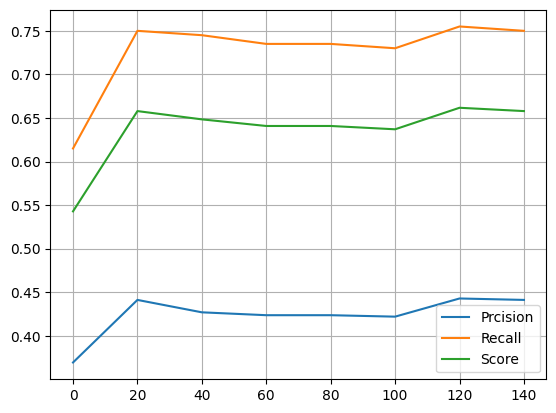